In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=tf.keras.datasets.fashion_mnist.load_data()
(X_train,y_train),(X_test,y_test)=df

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("Train Image: " , X_train.shape)
print("Train Label: " , y_train.shape)
print("Test Image: " , X_test.shape)
print("Test Label: " , y_test.shape)

Train Image:  (60000, 28, 28)
Train Label:  (60000,)
Test Image:  (10000, 28, 28)
Test Label:  (10000,)


In [27]:
class_labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

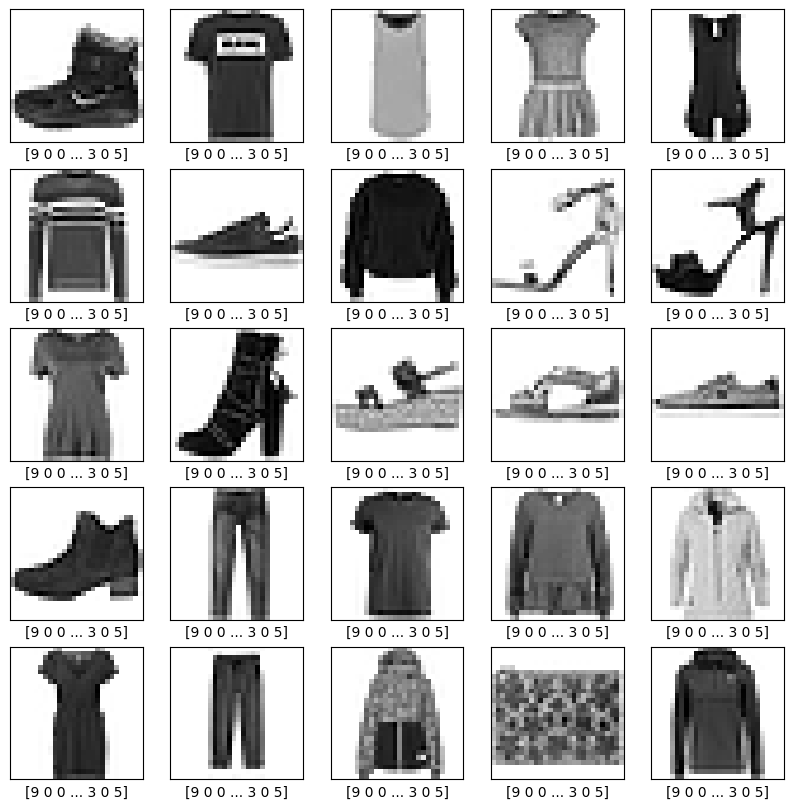

In [4]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i],cmap=plt.cm.binary)
  plt.xlabel(y_train)

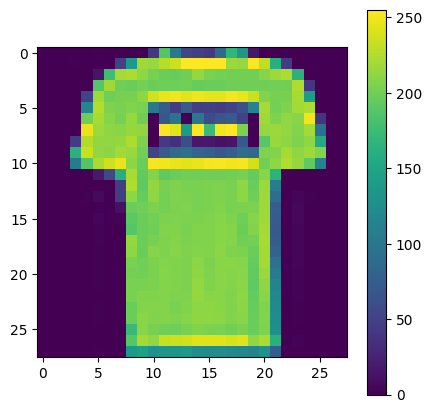

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [6]:
#print pixel value
for row in X_train[1]:
  for pixel in row:
    print(f"{pixel:3}",end="")
  print()

  0  0  0  0  0  1  0  0  0  0 41188103 54 48 43 87168133 16  0  0  0  0  0  0  0  0
  0  0  0  1  0  0  0 49136219216228236255255255255217215254231160 45  0  0  0  0  0
  0  0  0  0  0 14176222224212203198196200215204202201201201209218224164  0  0  0  0
  0  0  0  0  0188219200198202198199199201196198198200200200200201200225 41  0  0  0
  0  0  0  0 51219199203203212238248250245249246247252248235207203203222140  0  0  0
  0  0  0  0116226206204207204101 75 47 73 48 50 45 51 63113222202206220224  0  0  0
  0  0  0  0200222209203215200  0 70 98  0103 59 68 71 49  0219206214210250 38  0  0
  0  0  0  0247218212210215214  0254243139255174251255205  0215217214208220 95  0  0
  0  0  0 45226214214215224205  0 42 35 60 16 17 12 13 70  0189216212206212156  0  0
  0  0  0164235214211220216201 52 71 89 94 83 78 70 76 92 87206207222213219208  0  0
  0  0  0106187223237248211198252250248245248252253250252239201212225215193113  0  0
  0  0  0  0  0 17 5415922219320819219720020020020020120319521016

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [9]:
#print pixel value
for row in X_train[1]:
  for pixel in row:
    print(f"{pixel:0.1}",end="")
  print()

0e+000e+000e+000e+000e+000.0040e+000e+000e+000e+000.20.70.40.20.20.20.30.70.50.060e+000e+000e+000e+000e+000e+000e+000e+00
0e+000e+000e+000.0040e+000e+000e+000.20.50.90.80.90.91e+001e+001e+001e+000.90.81e+000.90.60.20e+000e+000e+000e+000e+00
0e+000e+000e+000e+000e+000.050.70.90.90.80.80.80.80.80.80.80.80.80.80.80.80.90.90.60e+000e+000e+000e+00
0e+000e+000e+000e+000e+000.70.90.80.80.80.80.80.80.80.80.80.80.80.80.80.80.80.80.90.20e+000e+000e+00
0e+000e+000e+000e+000.20.90.80.80.80.80.91e+001e+001e+001e+001e+001e+001e+001e+000.90.80.80.80.90.50e+000e+000e+00
0e+000e+000e+000e+000.50.90.80.80.80.80.40.30.20.30.20.20.20.20.20.40.90.80.80.90.90e+000e+000e+00
0e+000e+000e+000e+000.80.90.80.80.80.80e+000.30.40e+000.40.20.30.30.20e+000.90.80.80.81e+000.10e+000e+00
0e+000e+000e+000e+001e+000.90.80.80.80.80e+001e+001e+000.51e+000.71e+001e+000.80e+000.80.90.80.80.90.40e+000e+00
0e+000e+000e+000.20.90.80.80.80.90.80e+000.20.10.20.060.070.050.050.30e+000.70.80.80.80.80.60e+000e+00
0e+000e+000e+000.60

In [10]:
#reshape dimensions
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [14]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64 , kernel_size=(3,3) , activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.7514 - loss: 0.6983 - val_accuracy: 0.8640 - val_loss: 0.3730
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.8739 - loss: 0.3549 - val_accuracy: 0.8814 - val_loss: 0.3350
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.8906 - loss: 0.3072 - val_accuracy: 0.8922 - val_loss: 0.3030
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9054 - loss: 0.2637 - val_accuracy: 0.8942 - val_loss: 0.2844
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9108 - loss: 0.2478 - val_accuracy: 0.9032 - val_loss: 0.2696
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9160 - loss: 0.2311 - val_accuracy: 0.9058 - val_loss: 0.2650
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9239 - loss: 0.2088 - val_accuracy: 0.9058 - val_loss: 0.2631
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 35ms/step - accuracy: 0.9263 -

In [17]:
loss , accuracy = model.evaluate(X_test,y_test)
print("Test Loss: ",loss)
print("Test Accuracy: ",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9005 - loss: 0.2892
Test Loss:  0.2788788974285126
Test Accuracy:  0.9024999737739563


In [18]:
#save model
model.save('fashion_mnist_model.h5')

In [25]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


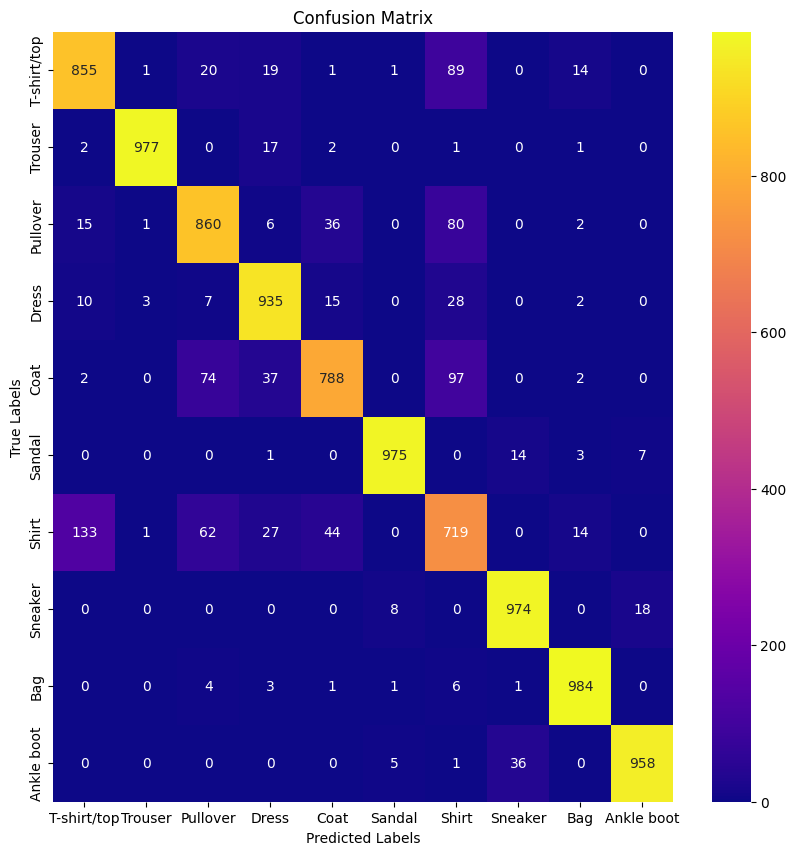

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma",xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()